In [1]:
import torch
import pandas
import numpy as np
from pipeline.diffprep_fix_pipeline import DiffPrepFixPipeline
from pipeline.diffprep_flex_pipeline import DiffPrepFlexPipeline
from prep_space import space
from experiment.experiment_utils import set_random_seed, load_data, build_data, grid_search, makedir, save_result, load_data_multitask

/Users/siddharth/miniconda3/envs/diffprep/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_prep_pipeline(path, prep_space, params, data_dir, dataset):

    X, y = load_data_multitask(data_dir, dataset)
    X_train, y_train, X_val, y_val, X_test, y_test = build_data(X, y, random_state=params["split_seed"])

    prep_pipeline = DiffPrepFixPipeline(prep_space, temperature=params["temperature"],
                                use_sample=params["sample"],
                                diff_method=params["diff_method"],
                                init_method=params["init_method"])
    prep_pipeline.init_parameters(X_train, X_val, X_test)
    prep_pipeline.load_state_dict(torch.load(path))
    #prep_pipeline.eval()

    return prep_pipeline

In [3]:
# define hyper parameters
params = {
    "num_epochs": 2000,
    "batch_size": 512,
    "device": "cpu",
    #"model_lr": [0.1, 0.01, 0.001],
    "model_lr": 0.01,
    "weight_decay": 0,
    "model": 'log',
    "train_seed": 1,
    "split_seed": 1,
    "method": "diffprep_fix",
    "save_model": True,
    "logging": False,
    "no_crash": False,
    "patience": 3,
    "momentum": 0.9
}

auto_prep_params = {
    "prep_lr": None,
    "temperature": 0.1,
    "grad_clip": None,
    "pipeline_update_sample_size": 512,
    "init_method": "default",
    "diff_method": "num_diff",
    "sample": False
}

params.update(auto_prep_params)

DATADIR = "data"
dataset = "house_prices"


In [4]:
prep_pipeline_price = load_prep_pipeline('./result/diffprep_fix/house_prices/price_ground_truth/prep_pipeline.pth', space, params, DATADIR, dataset)

In [5]:
sim = 0.5

In [6]:
import torch.nn.functional as F

In [7]:
price_pipeline_params = prep_pipeline_price.state_dict()

In [8]:
def get_pipeline_ops(prep_pipeline_params):
    pipeline_ops = {}
    for pipeline_step, pipeline in prep_pipeline_params.items():
        #print(pipeline_step, pipeline.shape)
        pipeline = F.softmax(pipeline)
        #pipeline_arr = pipeline.numpy()
        #pipeline_ops[pipeline_step] = pipeline_arr.argmax(axis=1)
        pipeline_ops[pipeline_step] = pipeline
    return pipeline_ops

In [9]:
price_pipeline_ops = get_pipeline_ops(price_pipeline_params)

In [10]:
len(price_pipeline_ops)

5

In [11]:
import matplotlib.pyplot as plt

In [12]:
sims = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mean_agr = []
mean_ce = []
all_agrs = []
all_ces = []

synth_price_pipeline_ops_map = {}

In [27]:
synth_price_pipeline_ops[pipeline_step].argmax(axis=1)

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 5, 2, 6, 6,
        6, 2, 6, 6, 2, 2, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 2, 2, 6, 6, 6, 2, 5, 6, 6, 6, 6, 6, 2, 6,
        6, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6,
        6, 2, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 2,
        6, 6, 2, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 5, 6, 6, 6, 6, 6, 2, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6])

In [30]:
price_pipeline_op

tensor([[2.1642e-02, 5.9897e-03, 7.2611e-03,  ..., 6.3077e-03, 7.4474e-03,
         9.2831e-01],
        [3.8275e-02, 8.8612e-02, 1.7010e-01,  ..., 1.6203e-01, 1.8961e-01,
         3.1253e-01],
        [9.1695e-02, 1.1012e-01, 9.6663e-02,  ..., 8.0899e-02, 9.0647e-02,
         4.7712e-01],
        ...,
        [1.4561e-03, 8.7858e-04, 1.1482e-03,  ..., 8.7858e-04, 1.1482e-03,
         9.9303e-01],
        [3.0540e-03, 2.3645e-02, 9.3288e-01,  ..., 4.3016e-03, 1.4014e-03,
         2.9596e-02],
        [2.4356e-02, 1.6827e-02, 2.1059e-02,  ..., 1.6848e-02, 2.1289e-02,
         8.7527e-01]])

In [13]:
for sim in sims:
    ces = []
    agrs = []
    prep_pipeline_price_synth = load_prep_pipeline(f'./result/diffprep_fix/house_prices/price_{sim}/prep_pipeline.pth', space, params, DATADIR, dataset)
    synth_price_pipeline_params = prep_pipeline_price_synth.state_dict()
    synth_price_pipeline_ops = get_pipeline_ops(synth_price_pipeline_params)
    synth_price_pipeline_ops_map[sim] = synth_price_pipeline_ops
    for pipeline_step in price_pipeline_ops.keys():
        price_pipeline_op = price_pipeline_ops[pipeline_step]

        synth_price_pipeline_op = synth_price_pipeline_ops[pipeline_step]

        ce = -(synth_price_pipeline_op * np.log2(price_pipeline_op)).sum(axis=1).mean()
        agr = (synth_price_pipeline_op.argmax(axis=1) == price_pipeline_op.argmax(axis=1)).numpy().mean()

        #print(pipeline_step)
        #print("CE", ce)
        #print("Agreement %", pipeline_step, agr)
        ces.append(ce)
        agrs.append(agr)

    all_agrs.append(agrs)
    all_ces.append(ces)

    mean_agr.append(np.array(agrs).mean())
    mean_ce.append(np.array(ces).mean())

    #plt.plot(ces)

In [14]:
tf_keys = ['pipeline.0.num_tf_prob_logits', 'pipeline.0.cat_tf_prob_logits', 'pipeline.1.tf_prob_logits', 'pipeline.2.tf_prob_logits', 'pipeline.3.tf_prob_logits']
operation_names = ['Numerical Imputation', 'Categorical Imputation', 'Normalization', 'Outlier Removal', 'Discretization']

ops_agr_mean = {}
ops_agr_stddev = {}
ops_agr_arrs = {}

In [15]:
for op_name, key in zip(operation_names, tf_keys):
    ops_agreement = []
    for sim in sims:
        synth_rating_pipeline_exact_ops = np.argmax(synth_price_pipeline_ops_map[sim][key], axis=1)
        rating_pipeline_exact_ops = np.argmax(price_pipeline_ops[key], axis=1)
        ops_agreement.append((synth_rating_pipeline_exact_ops == rating_pipeline_exact_ops).numpy().mean())
    ops_agreement = np.array(ops_agreement)
    ops_agr_arrs[op_name] = ops_agreement
    ops_agr_mean[op_name] = ops_agreement.mean()
    ops_agr_stddev[op_name] = ops_agreement.std()

In [16]:
ops_agr_arrs['Normalization']

array([0.72881356, 0.72881356, 0.72881356, 0.72881356, 0.71864407,
       0.72881356, 0.72881356, 0.72881356, 0.72881356, 0.72542373])

In [17]:
ops_agr_stddev

{'Numerical Imputation': 0.0,
 'Categorical Imputation': 0.010173957169307529,
 'Normalization': 0.0031068309796310604,
 'Outlier Removal': 1.1102230246251565e-16,
 'Discretization': 0.008310271642122892}

In [18]:
mean_ce

[2.3743644,
 2.3745747,
 2.3748262,
 2.3594422,
 2.3636453,
 2.3732433,
 2.3731017,
 2.3824937,
 2.355266,
 2.2036533]

In [21]:
ops_agr_mean

{'Numerical Imputation': 1.0,
 'Categorical Imputation': 0.9453488372093025,
 'Normalization': 0.727457627118644,
 'Outlier Removal': 0.7966101694915253,
 'Discretization': 0.7772881355932203}

In [24]:
ops_agr_arrs

{'Numerical Imputation': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Categorical Imputation': array([0.96124031, 0.95736434, 0.9379845 , 0.95348837, 0.93410853,
        0.93410853, 0.94186047, 0.9379845 , 0.9379845 , 0.95736434]),
 'Normalization': array([0.72881356, 0.72881356, 0.72881356, 0.72881356, 0.71864407,
        0.72881356, 0.72881356, 0.72881356, 0.72881356, 0.72542373]),
 'Outlier Removal': array([0.79661017, 0.79661017, 0.79661017, 0.79661017, 0.79661017,
        0.79661017, 0.79661017, 0.79661017, 0.79661017, 0.79661017]),
 'Discretization': array([0.77966102, 0.77966102, 0.77966102, 0.77966102, 0.75254237,
        0.77966102, 0.77966102, 0.77966102, 0.77966102, 0.78305085])}

Text(0.5, 1.0, 'House Prices (price)')

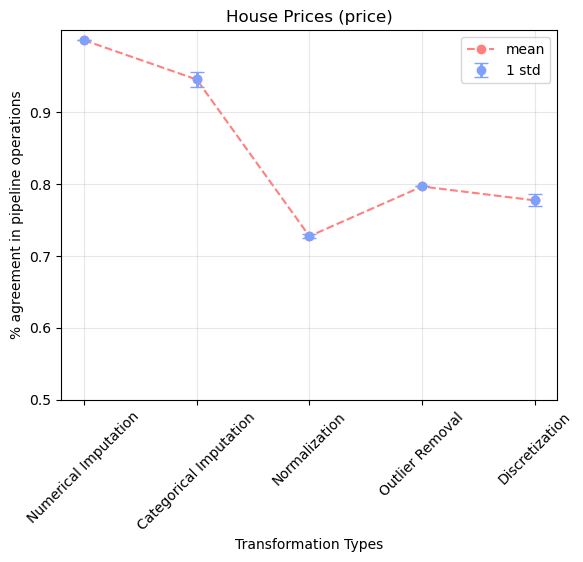

In [23]:
fig, ax = plt.subplots()

ax.plot(ops_agr_mean.keys(), list(ops_agr_mean.values()), color='#FE807F', label='mean', marker='o', linestyle='dashed')
plt.errorbar(ops_agr_mean.keys(), list(ops_agr_mean.values()), list(ops_agr_stddev.values()), fmt='o', capsize=5, elinewidth=2, color='#7EA1FF', label='1 std')

ax.set_xlabel("Transformation Types")
ax.set_ylabel("% agreement in pipeline operations")

ax.grid(alpha=0.3)


plt.yticks(np.arange(0.5, 1, 0.1))
plt.xticks(rotation=45)
plt.legend()

plt.title("House Prices (price)")

In [50]:
-(synth_price_pipeline_op * np.log2(price_pipeline_op)).sum(axis=1).mean()

tensor(2.6955)

In [51]:
all_ces[-1]

[tensor(2.0018),
 tensor(1.0182),
 tensor(2.2559),
 tensor(3.0469),
 tensor(2.6955)]

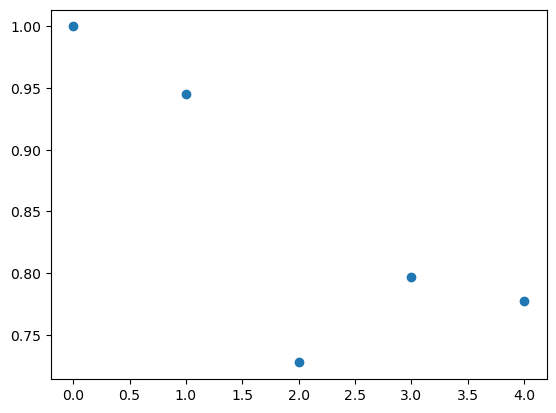

In [52]:
plt.scatter(range(0, 5), np.array(all_agrs).mean(axis=0))

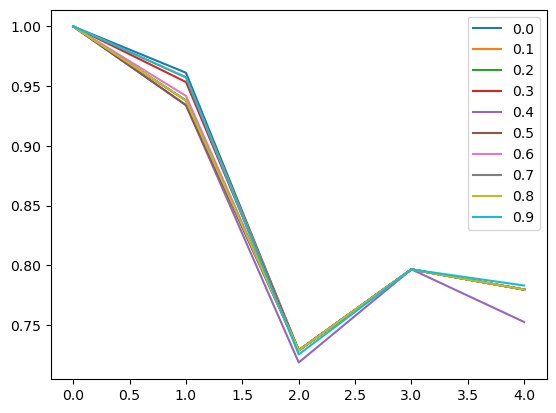

In [53]:
i = 0
for agr in all_agrs:
    plt.plot(agr, label=sims[i])
    i += 1
plt.legend()
plt.show()